{5: 53.0, 10: 50.8, 15: 73.2, 20: 93.5, 25: 101.7, 50: 101.9}
{5: 218.7, 10: 113.5, 15: 109.0, 20: 104.4, 25: 101.9, 50: 102.1}


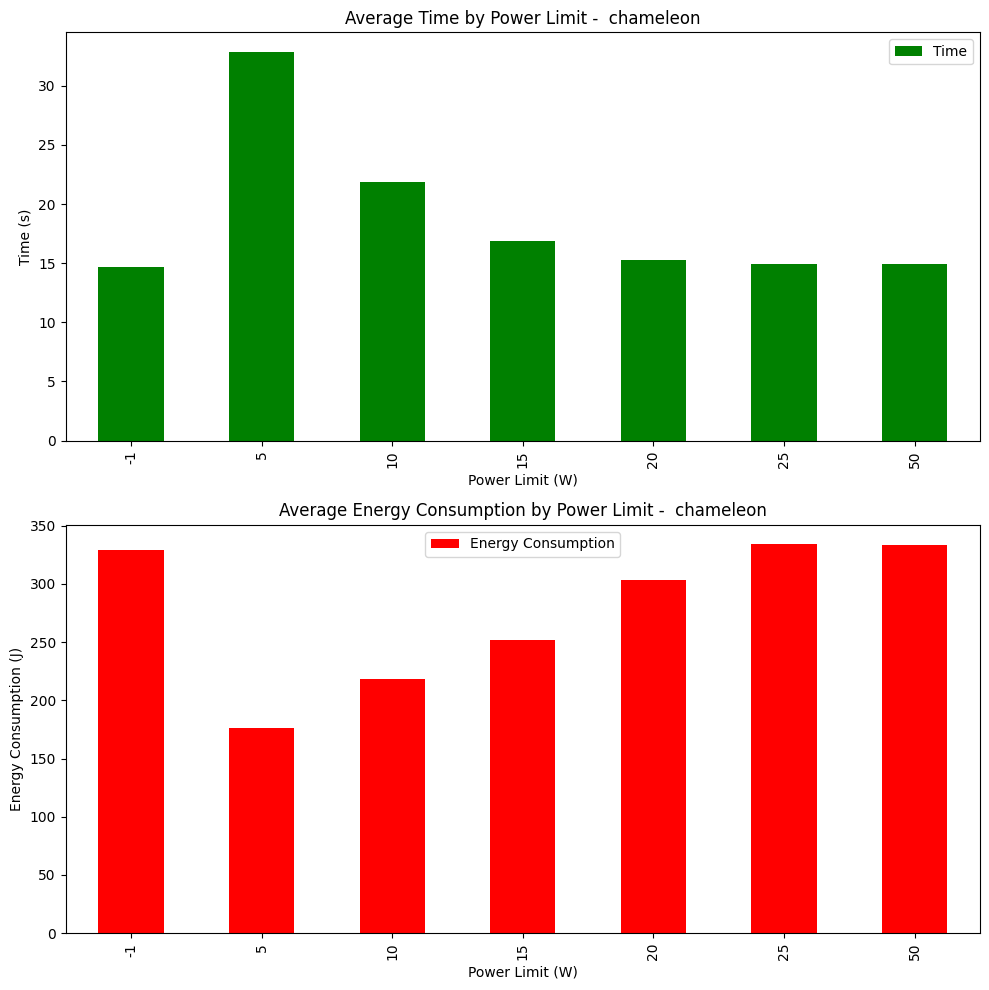

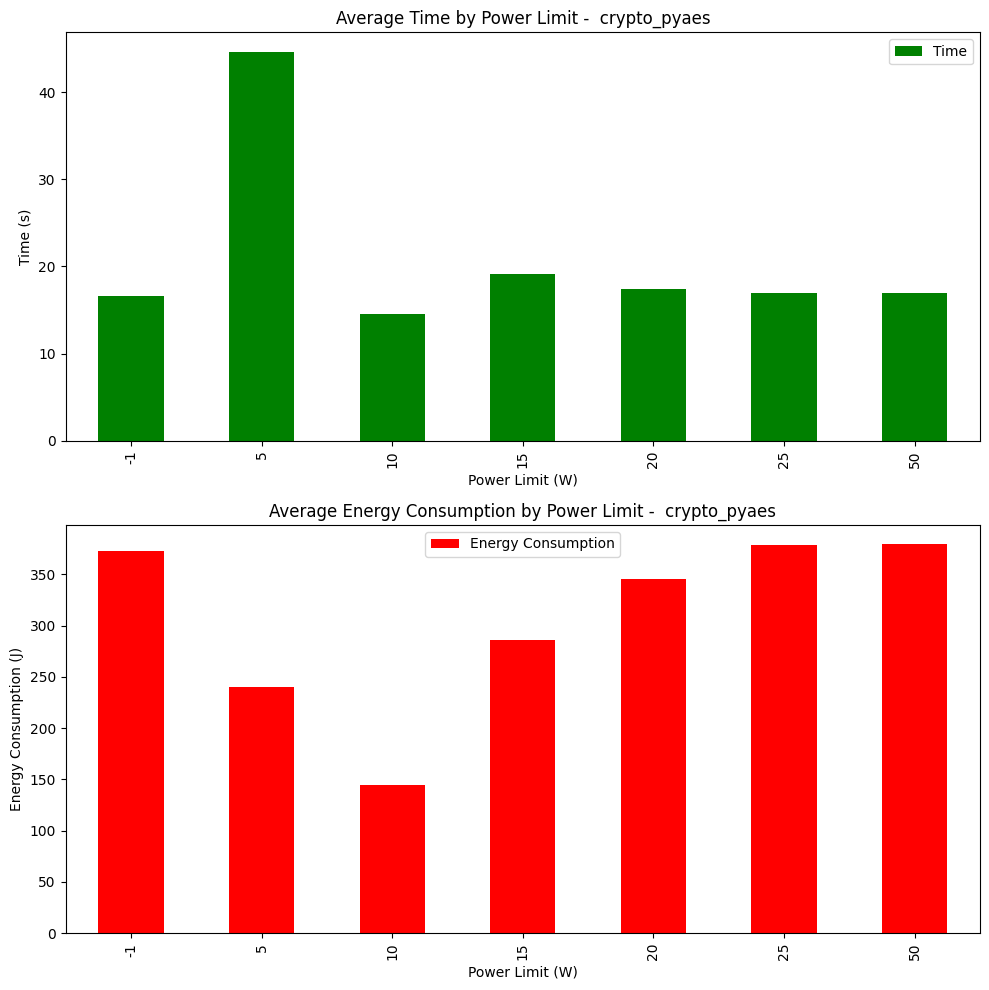

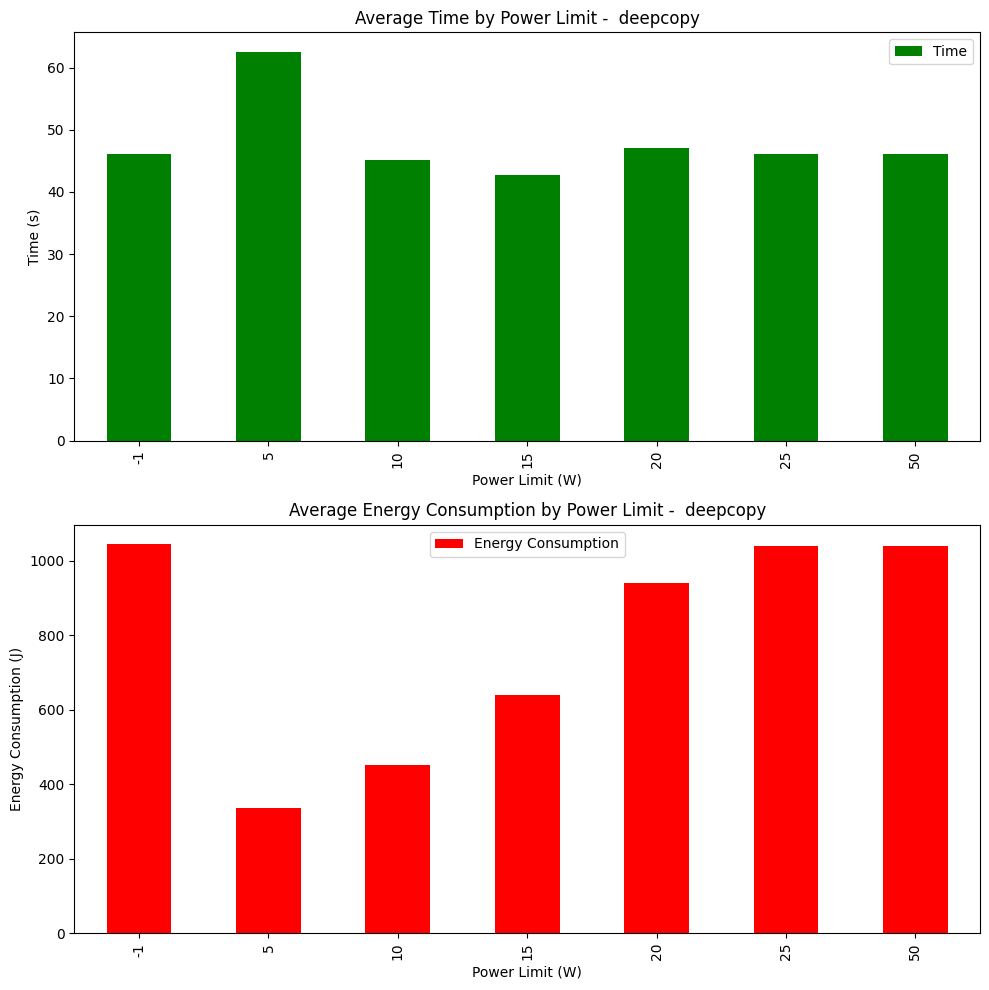

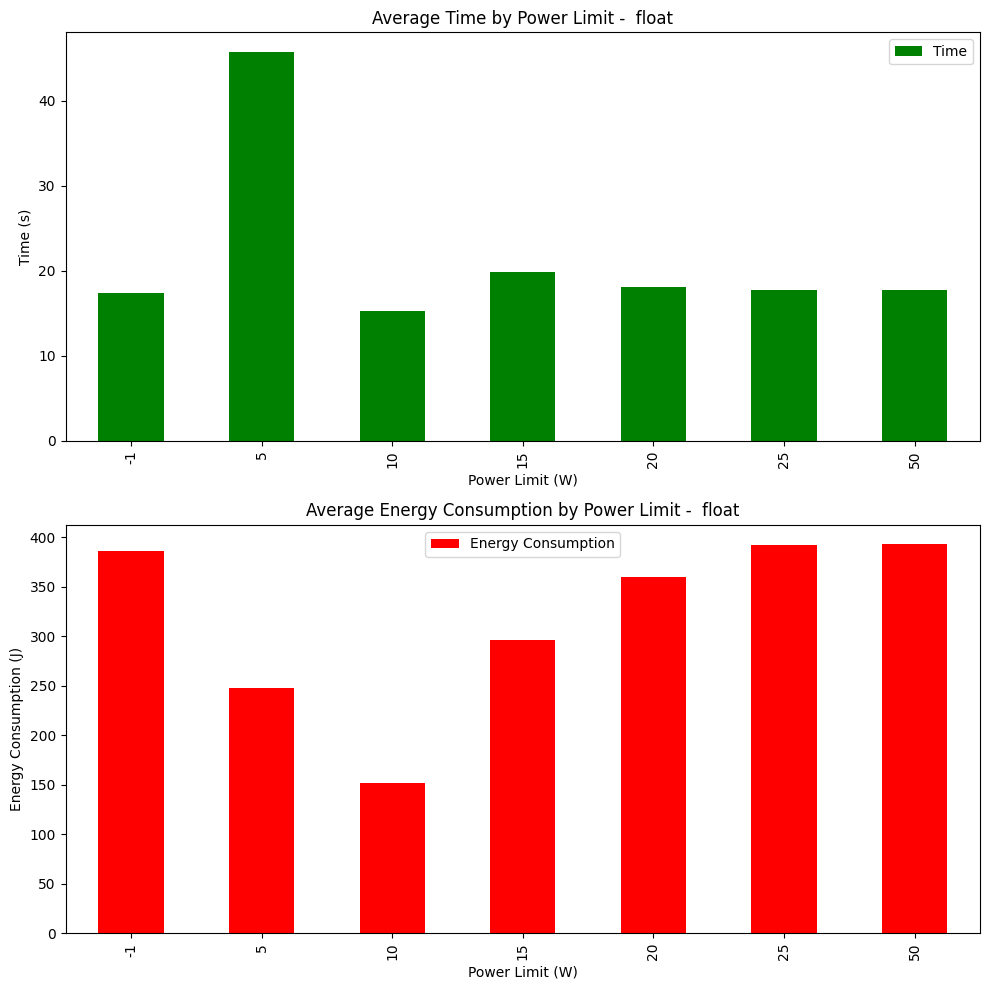

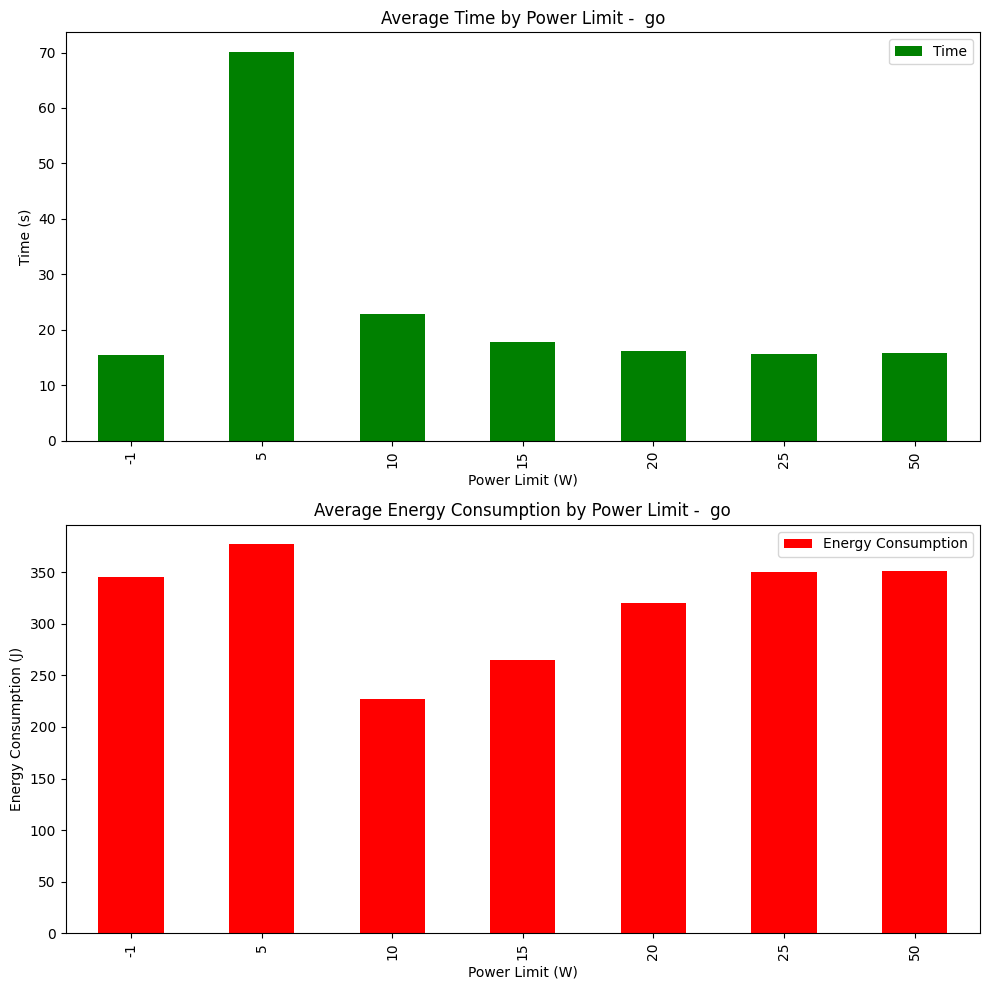

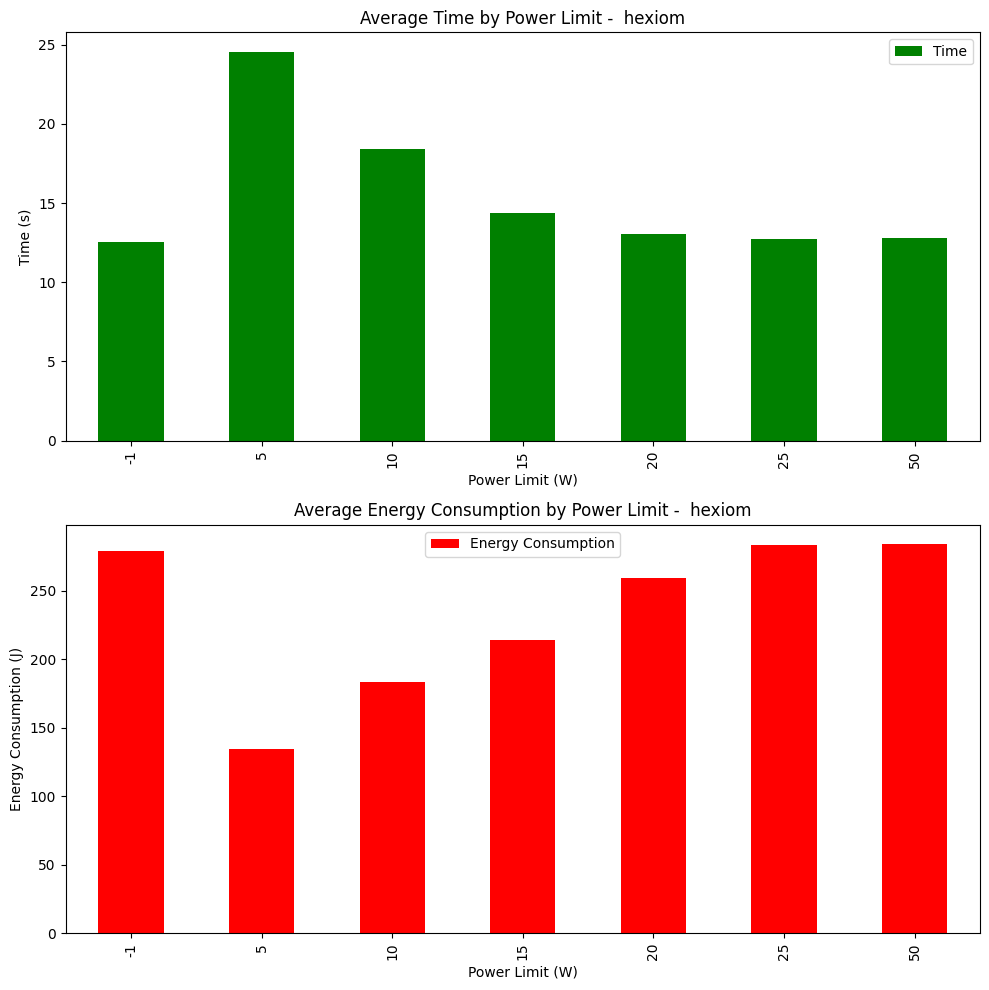

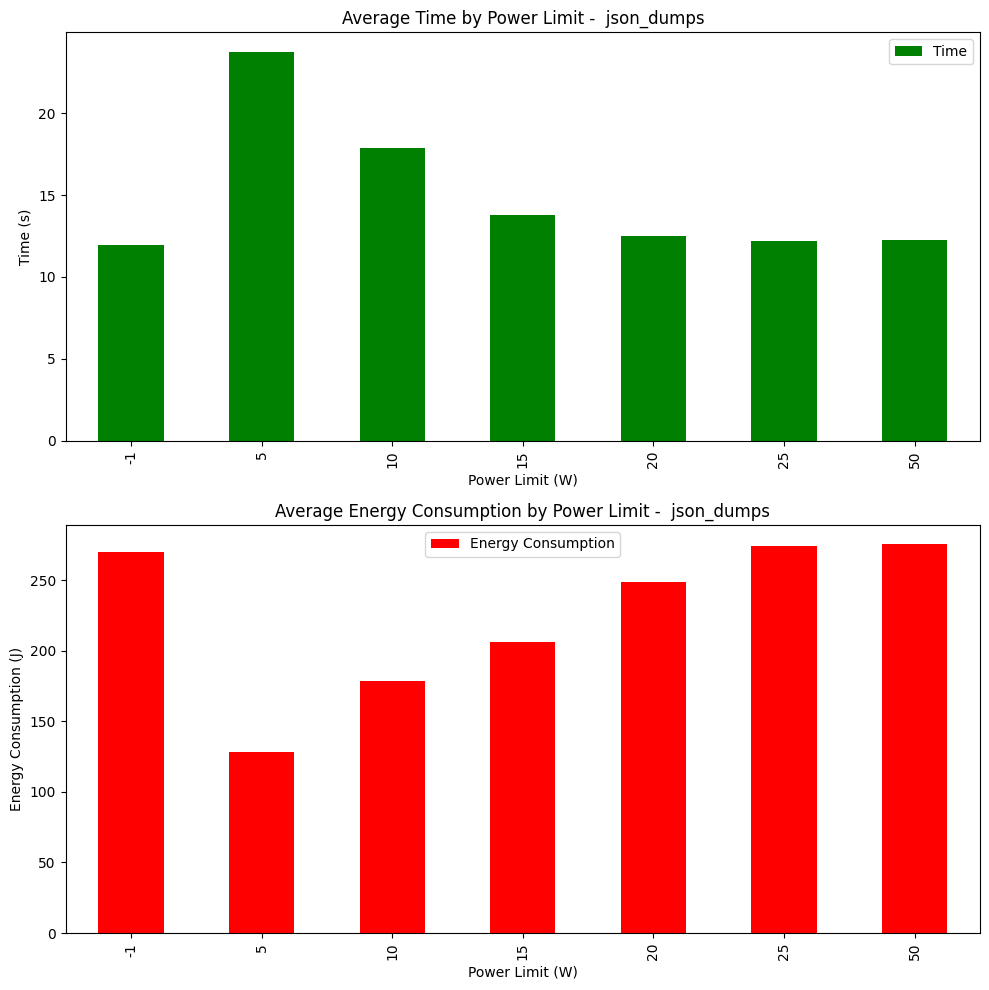

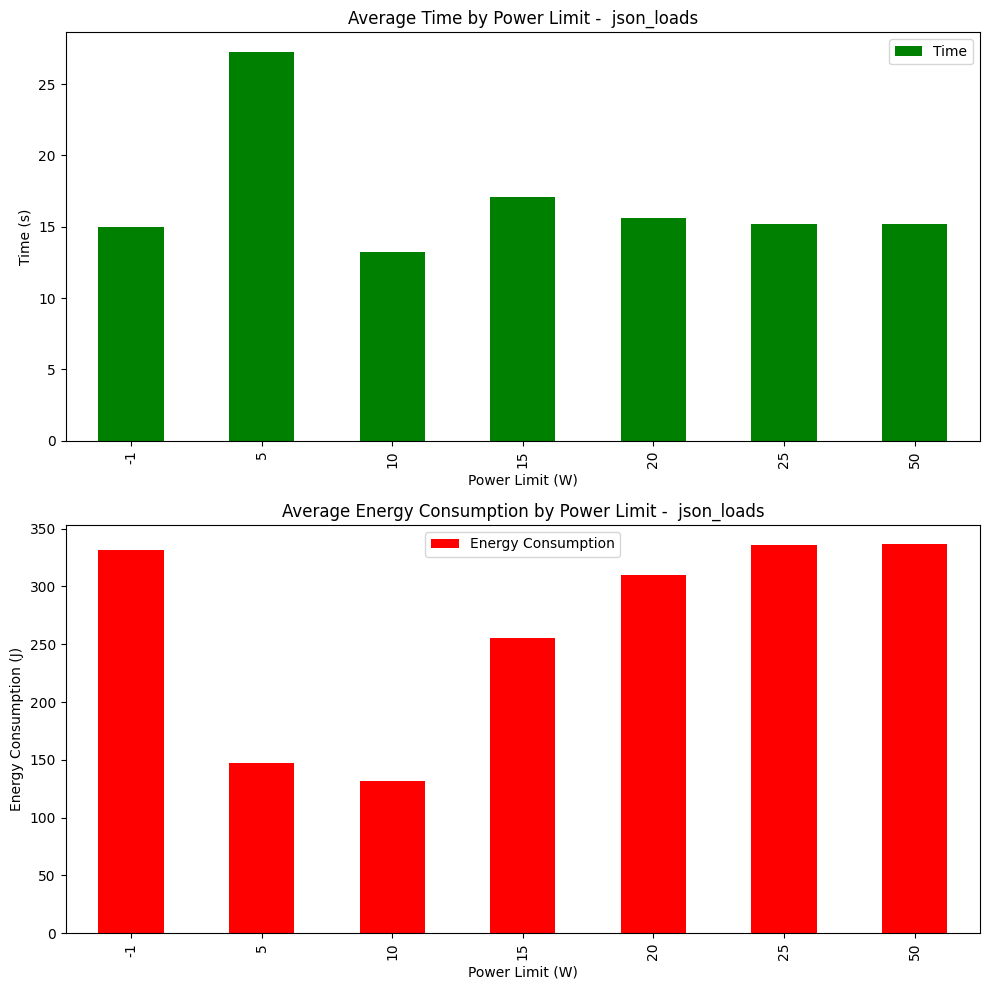

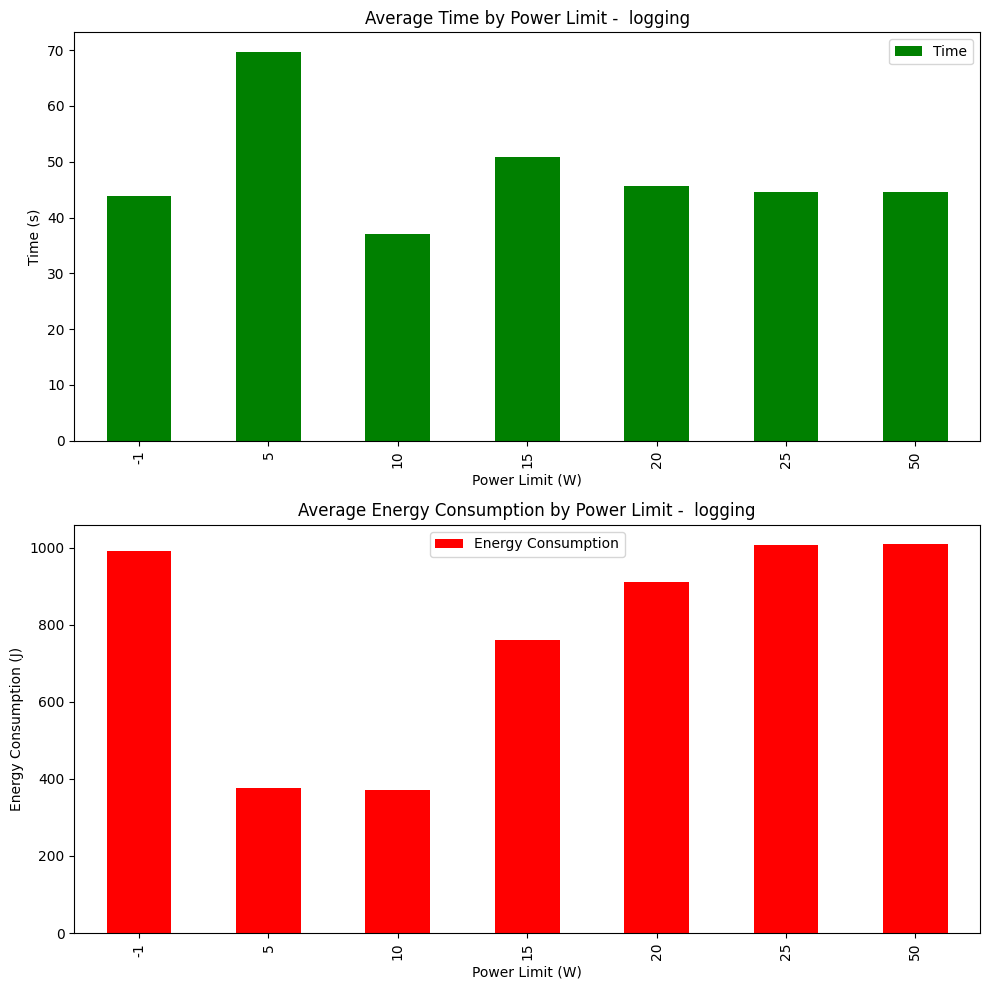

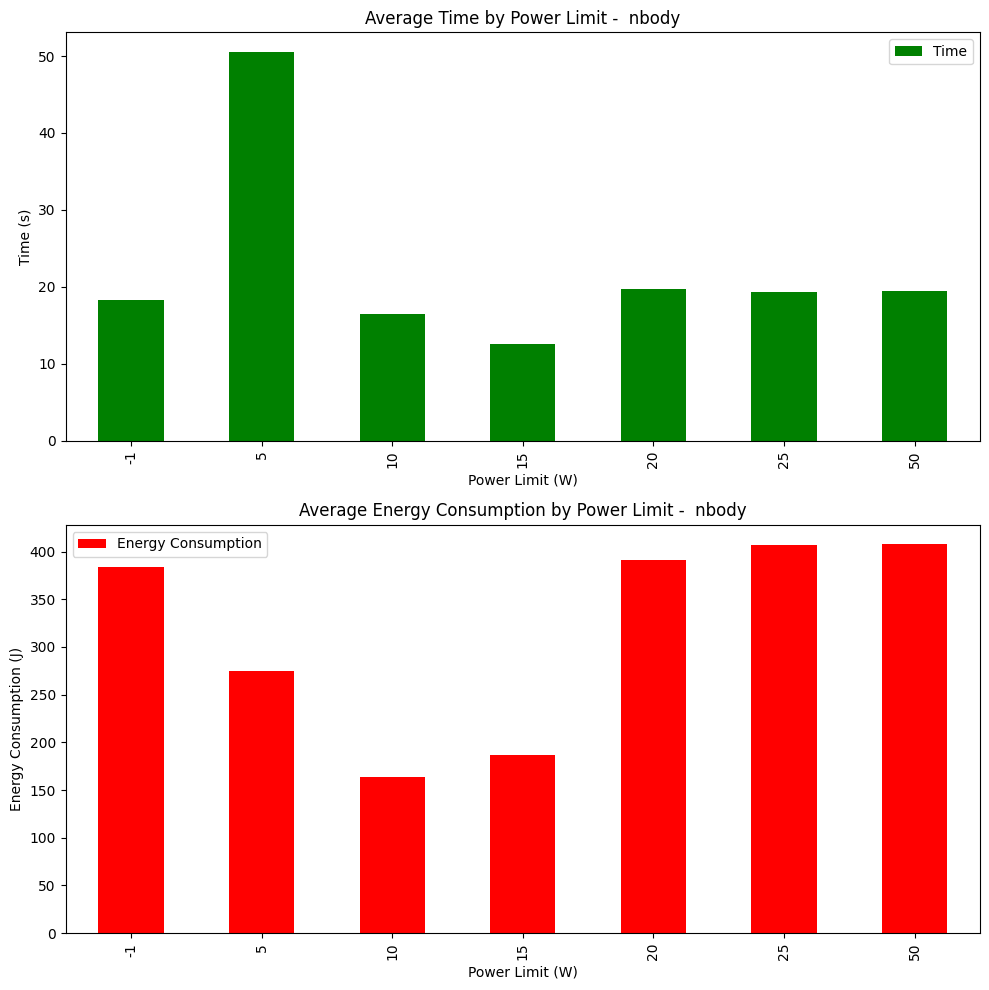

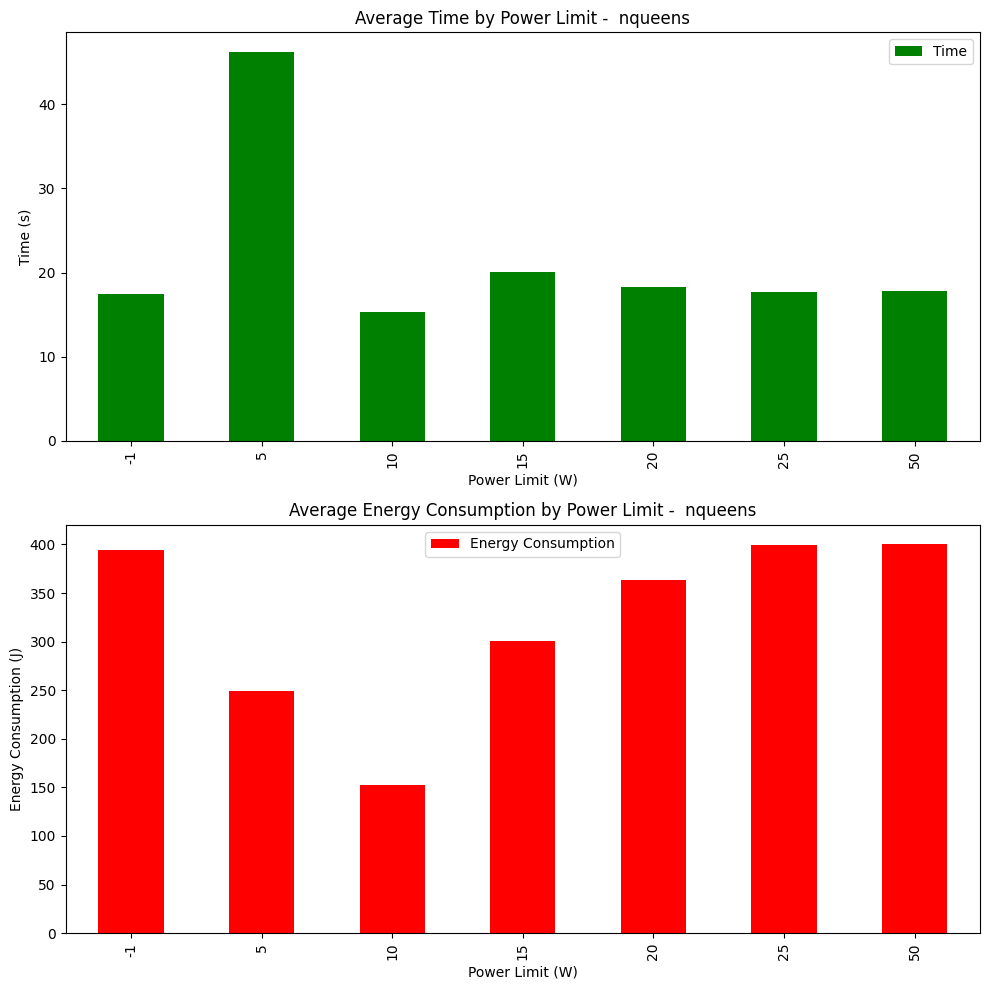

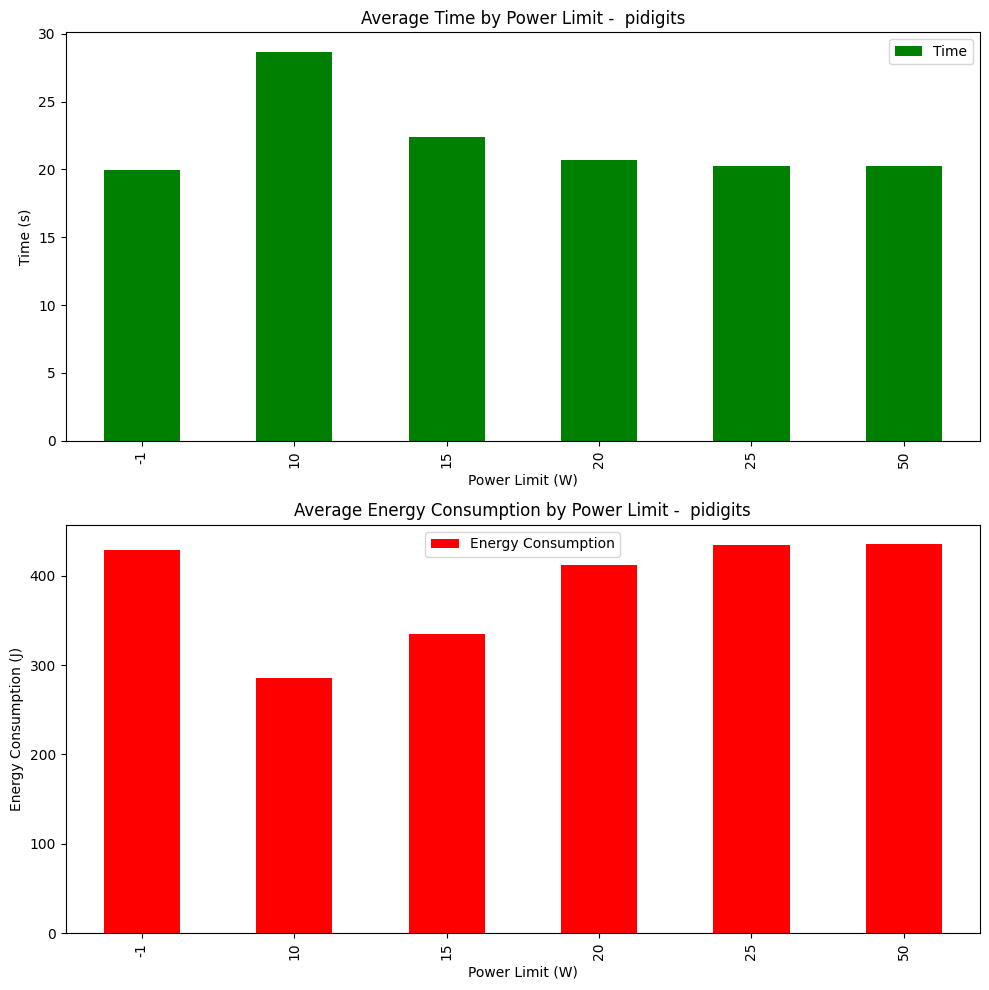

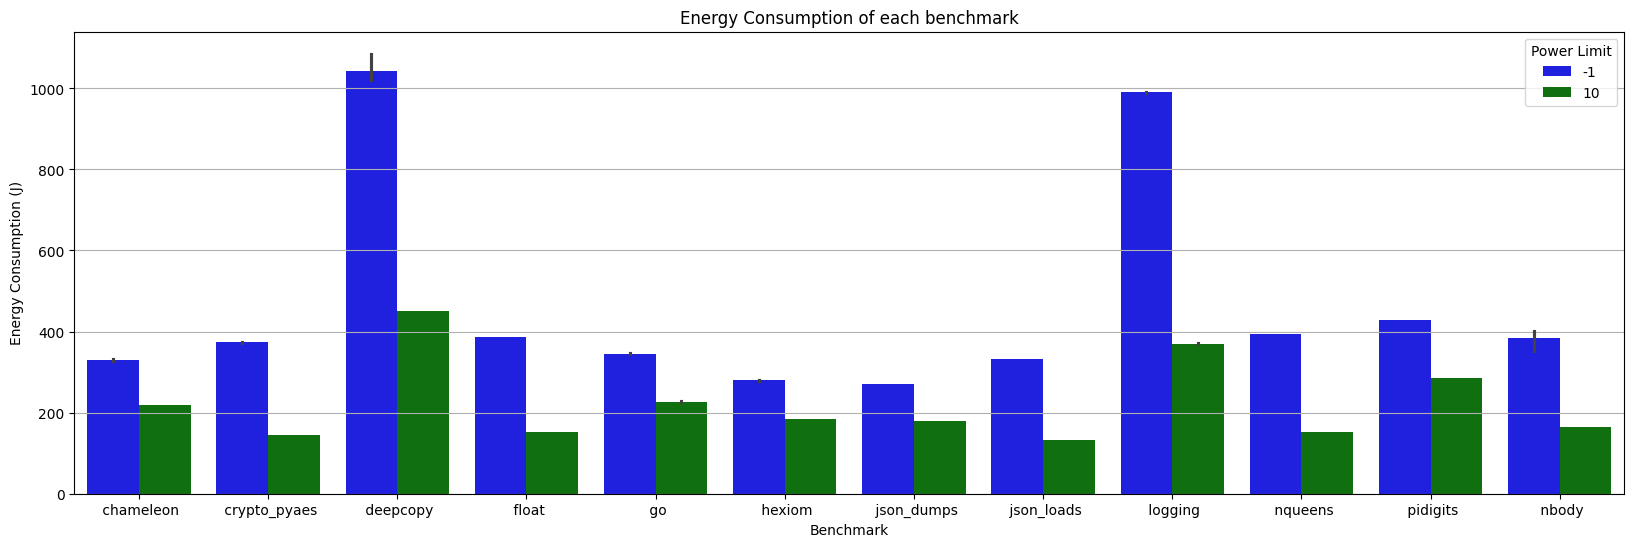

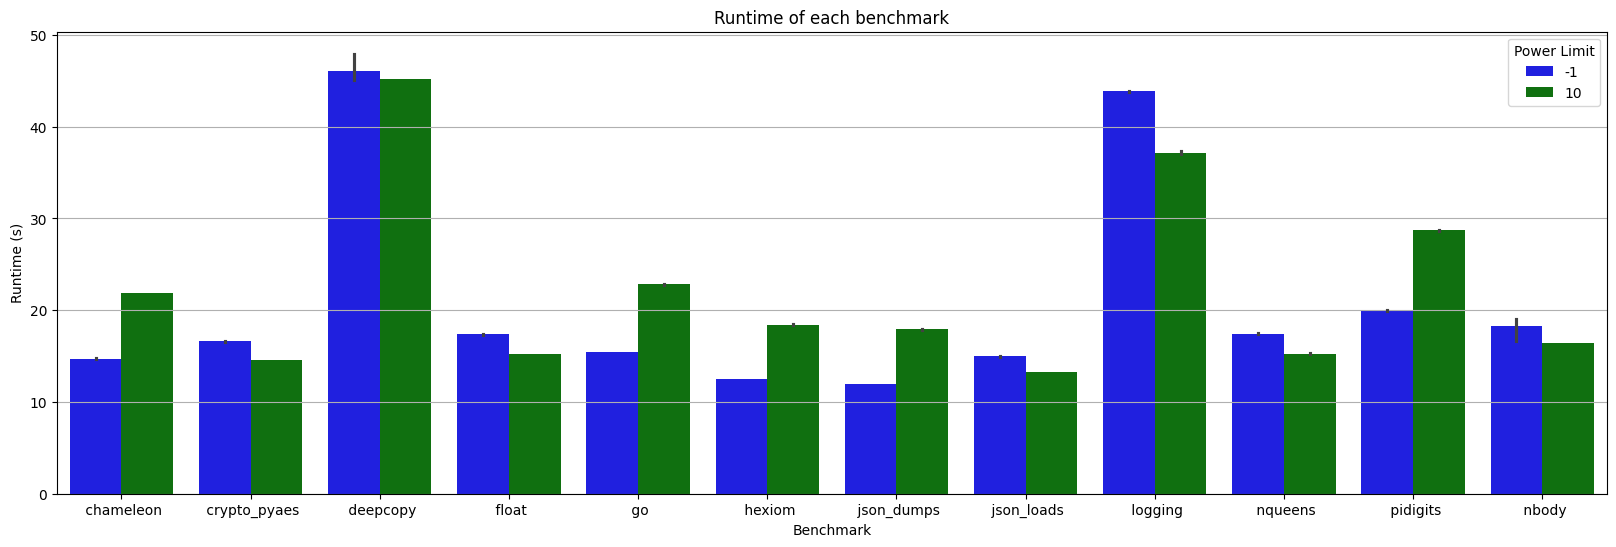

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv("measurementsGlobal.csv")

powerconsumed = data['Package']
time = (data['Time']/1000.0)
temperature = data['Temperature']
program = data['Program']
powerLimit = data['PowerLimit']

colours = {'Temperature': 'blue', 'Time': 'green', 'Energy Consumption': 'red'}

threshold = 3
df = pd.DataFrame({'Program': program, 'PowerLimit': powerLimit, 'Temperature': temperature, 'Energy Consumption': powerconsumed, 'Time': time})

# Recalculate mean after filtering outliers
filtered_df = df[(df['Time'].abs() < df['Time'].mean() + threshold * df['Time'].std()) & 
                (df['Energy Consumption'].abs() < df['Energy Consumption'].mean() + threshold * df['Energy Consumption'].std())]
grouped = filtered_df.groupby(['Program', 'PowerLimit']).mean().reset_index()

# Iterate over each group and create plots
powerLimitTable = {5: 0, 10:0,15:0,20:0,25:0,50:0}
timeTable = {5: 0, 10:0,15:0,20:0,25:0,50:0}
number_of_progs = 0
for _, group in grouped.groupby('Program'):
    number_of_progs += 1
    for i in range(1,len(group["PowerLimit"])):
        powerLimitGain = (group.iloc[i]["Energy Consumption"] * 100 )/group.iloc[0]["Energy Consumption"]
        powerLimitTable[group.iloc[i]["PowerLimit"]] += powerLimitGain
        timeGain = (group.iloc[i]["Time"] * 100 )/group.iloc[0]["Time"]
        timeTable[group.iloc[i]["PowerLimit"]] += timeGain


    fig, axes = plt.subplots(2, 1, figsize=(10, 10))

    # Plot Time
    group.plot(x='PowerLimit', y='Time', kind='bar', ax=axes[0],color=colours['Time'] , title=f'Average Time by Power Limit - {group["Program"].iloc[0]}')
    axes[0].set_ylabel('Time (s)')
    axes[0].set_xlabel('Power Limit (W)')

    # Plot Energy Consumption
    group.plot(x='PowerLimit', y='Energy Consumption', kind='bar', ax=axes[1],color=colours['Energy Consumption'] , title=f'Average Energy Consumption by Power Limit - {group["Program"].iloc[0]}')
    axes[1].set_ylabel('Energy Consumption (J)')
    axes[1].set_xlabel('Power Limit (W)')

    plt.tight_layout()
    plt.savefig(f'images/{group["Program"].iloc[0]}.png')
    #plt.show()


for k,v in powerLimitTable.items():
    powerLimitTable[k] = round(powerLimitTable[k] / number_of_progs,1)
print(powerLimitTable)

for k,v in timeTable.items():
    timeTable[k] = round(timeTable[k] / number_of_progs,1)
print(timeTable) 

powerLimitcolors = {-1: "blue", 10: "green"}

filtered_df2 = df[(df['Time'].abs() < df['Time'].mean() + threshold * df['Time'].std()) & 
                  ((df['PowerLimit'] == -1) | (df['PowerLimit'] == 10)) &
                (df['Energy Consumption'].abs() < df['Energy Consumption'].mean() + threshold * df['Energy Consumption'].std())]# Calculate mean time and memory for each power limit

# Energy Consumption plot

plt.figure(figsize=(20, 6))
sns.barplot(data=filtered_df2, x='Program', y='Energy Consumption', hue='PowerLimit', palette=powerLimitcolors)
plt.title(f"Energy Consumption of each benchmark")
plt.xlabel('Benchmark')
plt.ylabel('Energy Consumption (J)')
plt.grid(axis='y')
plt.legend(title='Power Limit')
plt.show()

# Runtime plot

plt.figure(figsize=(20, 6))
sns.barplot(data=filtered_df2, x='Program', y='Time', hue='PowerLimit', palette=powerLimitcolors)
plt.title(f"Runtime of each benchmark")
plt.xlabel('Benchmark')
plt.ylabel('Runtime (s)')
plt.grid(axis='y')
plt.legend(title='Power Limit')
plt.show()
